# MACHINE LEARNING LAB - BCSE209P

## Assessment 3

## Submitted by - Ishanvi Kotha (21BCE2712)

------------------------------------------------------------

## Question 1

Try a Support Vector Machine regressor (sklearn.svm.SVR), with various hyperparameters such as kernel="linear" (with various values for the C hyperparameter) or kernel="rbf" (with various values for the C and gamma hyperparameters).

-----

## Importing necessary libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

## Loading the dataset and inspecting it

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [4]:
data.shape

(333, 15)

### Checking for null values

In [5]:
data.isnull().any()

ID         False
crim       False
zn         False
indus      False
chas       False
nox        False
rm         False
age        False
dis        False
rad        False
tax        False
ptratio    False
black      False
lstat      False
medv       False
dtype: bool

### The "ID" column is not relevant hence we shall exclude it from the datasets

In [6]:
data = data.drop('ID', axis=1)

### Now we will identify the dependent and independent classes and split them accordingly

### All the columns are indepedent except "medv" which is the target class. Hence x = all columns except "medv" and y = "medv"

In [7]:
x = data.drop('medv', axis=1)
y = data['medv']

In [8]:
x.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
4,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43


In [9]:
y.head()

0    24.0
1    21.6
2    33.4
3    36.2
4    22.9
Name: medv, dtype: float64

### To standardize the dataset, we shall use StandardScaler

### As the values ranges from zero to a few hundreds, scaling is necessary to normalize the data to ensure equal contribution of features

In [10]:
scaler_x = StandardScaler()
scaler_y = StandardScaler()

In [11]:
x_scaled = scaler_x.fit_transform(x)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

### Splitting the dataset into training and testing dataset

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.2, random_state=42)

---------------------------------------------------------------------------------
### Applying linear kernel

### Linear kernel assumes linear relationship between the features i.e, it uses a straight 2D line to separate the data

In [13]:
print("Results for Linear Kernel - \n")
for C in [0.1, 1, 10]:
    svr_linear = SVR(kernel="linear", C=C)
    svr_linear.fit(x_train, y_train)
    
    y_pred = svr_linear.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    
    print(f"Linear Kernel, C={C}: MSE={mse:.4f}")

Results for Linear Kernel - 

Linear Kernel, C=0.1: MSE=0.2604
Linear Kernel, C=1: MSE=0.2621
Linear Kernel, C=10: MSE=0.2615


### C=0.1 (MSE=0.2604): The lowest MSE among the three, meaning the model with C=0.1 provides the best generalization to the test data.
### C=1 (MSE=0.2621): Slightly higher MSE, which suggests that increasing C did not improve the performance.
### C=10 (MSE=0.2615): Marginally better than C=1 but still worse than C=0.1. Increasing C further did not lead to a significant performance gain.

### Hence C=0.1 has worked well for the model when implementing linear kernel

----------------------------------------------------------------------------

### Applying RBF kernel

### RBF kernel maps the original feature space into a higher-dimensional space, allowing the model to find a non-linear decision boundary hence allowing it to capture complex patterns that a linear model cannot capture

In [14]:
print("Results for RBF Kernel - \n")
for C in [1, 10]:
    for gamma in [0.1, 0.5, 1]:
        svr_rbf = SVR(kernel="rbf", C=C, gamma=gamma)
        svr_rbf.fit(x_train, y_train)
        
        y_pred = svr_rbf.predict(x_test)
        mse = mean_squared_error(y_test, y_pred)
        
        print(f"RBF Kernel, C={C}, gamma={gamma}: MSE={mse:.4f}")

Results for RBF Kernel - 

RBF Kernel, C=1, gamma=0.1: MSE=0.3078
RBF Kernel, C=1, gamma=0.5: MSE=0.6338
RBF Kernel, C=1, gamma=1: MSE=0.7866
RBF Kernel, C=10, gamma=0.1: MSE=0.2738
RBF Kernel, C=10, gamma=0.5: MSE=0.6281
RBF Kernel, C=10, gamma=1: MSE=0.7737


### C=10, gamma=0.1 gives the lowest MSE (MSE=0.2738), meaning this combination provides the best model performance on the test data. The model fits well without overfitting.

### As gamma increases (for both C=1 and C=10), the MSE increases. This indicates that increasing gamma makes the model more complex and prone to overfitting.

### Lower gamma (e.g., gamma=0.1) provides better generalization, while higher gamma (e.g., gamma=1) leads to higher errors due to overfitting.

### Higher C (e.g., C=10) leads to better performance because it penalizes errors more aggressively and fits the data more closely.

### Hence, the best-performing model using RBF Kernel, C=10, gamma=0.1, with an MSE of 0.2738. This combination provides a good balance between model complexity and generalization.

-------------------------------------------------------

### Plotting the best performing model created using Linear kernel

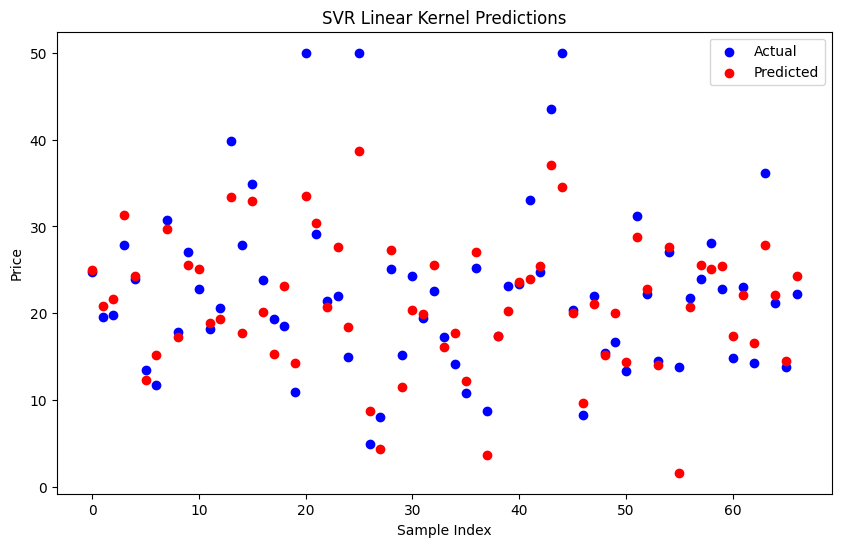

In [15]:
svr_linear_best = SVR(kernel="linear", C=0.1)
svr_linear_best.fit(x_train, y_train)
y_pred_linear_best = svr_linear_best.predict(x_test)

# Reshape y_test and y_pred_linear_best to 2D for inverse_transform
y_test_reshaped = y_test.reshape(-1, 1)
y_pred_linear_best_reshaped = y_pred_linear_best.reshape(-1, 1)

# Inverse transform the predictions and actual values to original scale
y_test_original = scaler_y.inverse_transform(y_test_reshaped).flatten()
y_pred_linear_best_original = scaler_y.inverse_transform(y_pred_linear_best_reshaped).flatten()

# Plot the actual vs predicted prices for Linear Kernel
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test_original)), y_test_original, color="blue", label="Actual")
plt.scatter(range(len(y_pred_linear_best_original)), y_pred_linear_best_original, color="red", label="Predicted")
plt.title("SVR Linear Kernel Predictions")
plt.xlabel("Sample Index")
plt.ylabel("Price")
plt.legend()
plt.show()

--------------------------------------------------------------------------------------------------

### Plotting the best performing model created using RBF kernel 

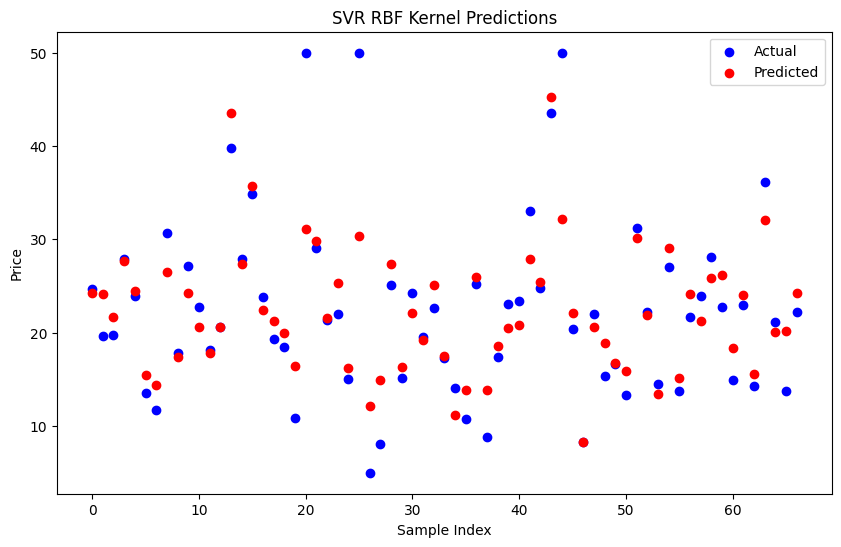

In [16]:
svr_rbf_best = SVR(kernel="rbf", C=10, gamma=0.1)
svr_rbf_best.fit(x_train, y_train)
y_pred_best = svr_rbf_best.predict(x_test)

# Reshape y_test and y_pred_best to 2D for inverse_transform
y_test_reshaped = y_test.reshape(-1, 1)
y_pred_best_reshaped = y_pred_best.reshape(-1, 1)

# Inverse transform the predictions and actual values to original scale
y_test_original = scaler_y.inverse_transform(y_test_reshaped).flatten()
y_pred_best_original = scaler_y.inverse_transform(y_pred_best_reshaped).flatten()

# Plot the actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test_original)), y_test_original, color="blue", label="Actual")
plt.scatter(range(len(y_pred_best_original)), y_pred_best_original, color="red", label="Predicted")
plt.title("SVR RBF Kernel Predictions")
plt.xlabel("Sample Index")
plt.ylabel("Price")
plt.legend()
plt.show()

------

### Finally, 
### Best performing Linear Kernel: MSE=0.2604
### Best performing RBF Kernel: MSE=0.2738

### The linear kernel model has a slightly lower MSE, indicating better performance on the test set.

------